In [46]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 

In [47]:
#importing millify
from millify import millify
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS
from textblob import TextBlob
import re
from collections import Counter

In [48]:
#importing sklearn
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md

import warnings
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv(r'covid19_tweets.csv')

In [50]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [51]:
#taking some inital values in the dataset
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [52]:
#taking some last values from the dataset
df.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False
179107,TUKY II,"Aliwal North, South Africa",TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...,2018-04-14 17:30:07,97,1697,566,False,2020-08-29 19:44:08,I stop when I see a Stop\n\n@SABCNews\n@Izinda...,NaN,Twitter for Android,False


In [53]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [54]:
#finding out the missing values 
df.isna().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

Data Visualization 


In [55]:
#printing the shape of the tweets of the dataframe
print('Shapes of the tweets of the dataframes : {}'.format(df.shape))

Shapes of the tweets of the dataframes : (179108, 13)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [57]:
#function for returning the missing values 
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)  #reassining the value
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='whitegrid', color_codes=True)
    sns.barplot(x='Name', y='count' , data=missing_values)
    plt.xticks(rotation=90)
    plt.show()

In [58]:
return_missing_values(df)

source              0.000430
user_description    0.057429
user_location       0.205301
hashtags            0.286609
dtype: float64

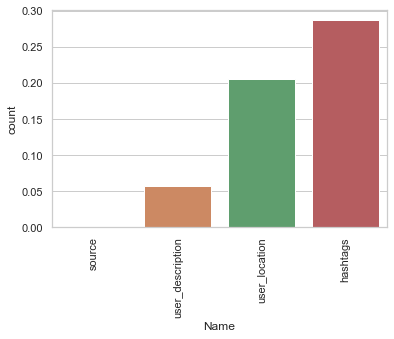

In [59]:
plot_missing_values(df)

In [60]:
#frequency of users tweeting about corona
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

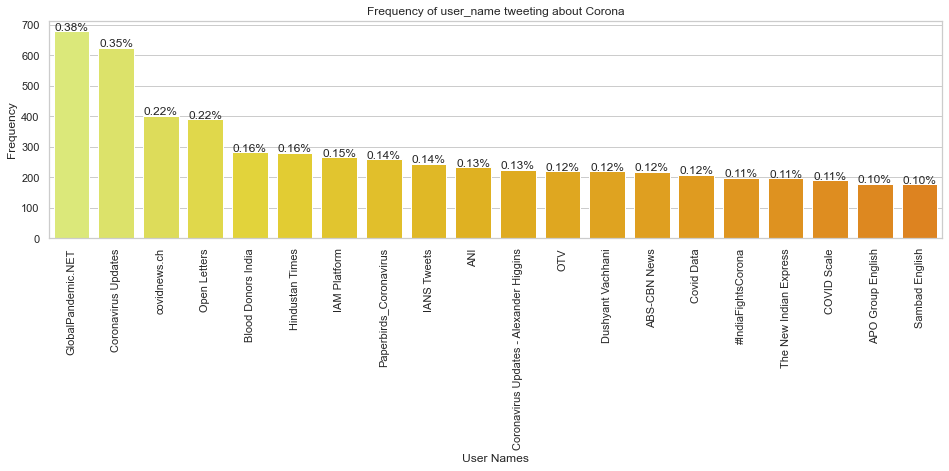

In [61]:
plot_frequency_charts(df, 'user_name', 'User Names','Wistia')

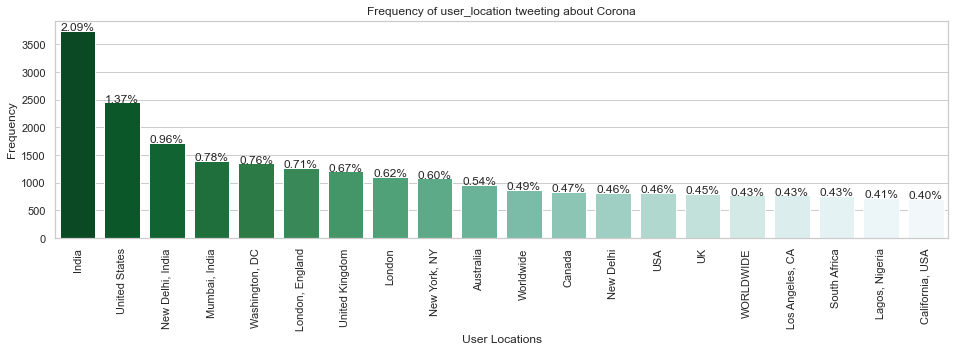

In [62]:
plot_frequency_charts(df, 'user_location', 'User Locations', 'BuGn_r')

Sentimental Analysis

In [63]:
# Drop Columns
drop_columns = [
    'user_name',
    'user_description',
    'user_created',
    'user_followers',
    'user_friends',
    'user_favourites',
    'user_verified',
    'hashtags',
    'source',
    'is_retweet'
]

In [64]:
df.drop(columns=drop_columns, inplace=True)
df.head

<bound method NDFrame.head of                      user_location                 date  \
0                       astroworld  2020-07-25 12:27:21   
1                     New York, NY  2020-07-25 12:27:17   
2                 Pewee Valley, KY  2020-07-25 12:27:14   
3             Stuck in the Middle   2020-07-25 12:27:10   
4                Jammu and Kashmir  2020-07-25 12:27:08   
...                            ...                  ...   
179103             Ilorin, Nigeria  2020-08-29 19:44:21   
179104                     Ontario  2020-08-29 19:44:16   
179105                   🇨🇦 Canada  2020-08-29 19:44:15   
179106               New York City  2020-08-29 19:44:14   
179107  Aliwal North, South Africa  2020-08-29 19:44:08   

                                                     text  
0       If I smelled the scent of hand sanitizers toda...  
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...  
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...  
3       @brookbanktv 

Tweet Processing 

In [65]:
import re
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

from textblob import TextBlob
from textblob import Word

# stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\peeyu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [66]:
stop_words = set(stopwords.words('english'))

def tweet_scrubber(tweet):
    #making the twitter lower case
    tweet = tweet.lower()

    #removing mentions
    tweet = re.sub(r'@[A-Za-z0-9_]+','',tweet)

    #removing urls and other stuff
    to_remove = r'\d+|http?\S+|[^A-Za-z0-9]+'
    tweet = re.sub(to_remove, " ", tweet)
    return tweet

def tokenization_and_stem(tweet, stem=False, lemmatize=False):
    filtered_tweet = []
    words = word_tokenize(tweet) 

    # Remove stopwords and stem
    for word in words:
        if not word in stop_words:
            if lemmatize:
                filtered_tweet.append(Word(word).lemmatize())
            else:
                filtered_tweet.append(word)
            
    return filtered_tweet


In [69]:
df.text = df.text.apply(lambda x: tokenization_and_stem(tweet_scrubber(x), lemmatize=True))

In [ ]:
df.text.head()

0    [smelled, scent, hand, sanitizers, today, some...
1             [hey, made, sense, player, pay, respect]
2    [trump, never, claimed, covid, hoax, claim, ef...
3    [one, gift, covid, give, appreciation, simple,...
4    [july, medium, bulletin, novel, coronavirusupd...
Name: text, dtype: object

Sentimental Analysis

In [ ]:
# Function to perform sentitment analysis on trump and biden dataframes
def sentiment_analysis(df):
    
    # Determine polarity and subjectivity
    df['Polarity'] = df['tweets'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
    df['Subjectivity'] = df['tweets'].apply(lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)
    
    # Classify overall sentiment
    df.loc[df.Polarity > 0,'Sentiment'] = 'positive'
    df.loc[df.Polarity == 0,'Sentiment'] = 'neutral'
    df.loc[df.Polarity < 0,'Sentiment'] = 'negative'
    
    return df[['tweets','Polarity','Subjectivity','Sentiment']].head()
sentiment_analysis(df)

,tweets,Polarity,Subjectivity,Sentiment
0,"[smelled, scent, hand, sanitizers, today, some...",-0.25,0.250000,negative
1,"[hey, made, sense, player, pay, respect]",0.00,0.000000,neutral
2,"[trump, never, claimed, covid, hoax, claim, ef...",0.00,0.000000,neutral
3,"[one, gift, covid, give, appreciation, simple,...",0.00,0.357143,neutral
4,"[july, medium, bulletin, novel, coronavirusupd...",0.00,0.000000,neutral


In [ ]:
df['Sentiment'].value_counts()

neutral     76765
positive    72135
negative    30208
Name: Sentiment, dtype: int64

In [ ]:
df['Polarity'].value_counts()

 0.000000    76765
 0.500000     6502
 0.136364     5701
 0.250000     4100
 0.200000     3811
             ...  
 0.395833        1
 0.139773        1
 0.257738        1
 0.152083        1
-0.068571        1
Name: Polarity, Length: 3928, dtype: int64

In [ ]:
df['Subjectivity'].value_counts()

0.000000    63467
0.500000     9601
1.000000     7625
0.400000     5541
0.454545     5041
            ...  
0.298485        1
0.873016        1
0.354242        1
0.310909        1
0.374286        1
Name: Subjectivity, Length: 3317, dtype: int64

Text(0, 0.5, 'Number of tweets')

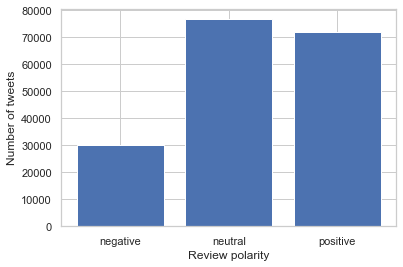

In [ ]:
#grah of sentiment
Sentimental_val = df.groupby('Sentiment').count()
plt.bar(Sentimental_val.index.values, Sentimental_val['tweets'])
plt.xlabel('Review polarity')
plt.ylabel('Number of tweets')

Text(0, 0.5, 'Number of tweets')

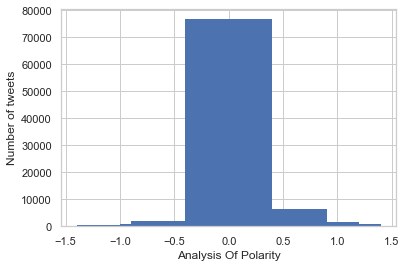

In [ ]:
#graph of polarity 
Polarity_val = df.groupby('Polarity').count()
plt.bar(Polarity_val.index.values, Polarity_val['tweets'], linewidth=0)
plt.xlabel('Analysis Of Polarity')
plt.ylabel('Number of tweets')

In [71]:
#graph of subjectivity
Subjectivity_val = df.groupby('Subjectivity').count()
plt.bar(Subjectivity_val.index.values, Subjectivity_val['tweets'])
plt.xlabel("Review of Subjectivity")
plt.ylabel("No of tweets")

KeyError: 'Subjectivity'

TypeError: unhashable type: 'list'

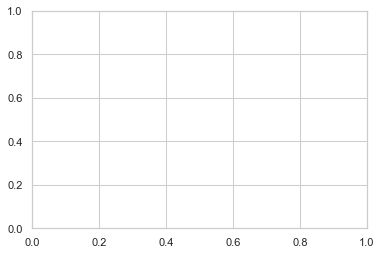

In [ ]:
#line plotting 
sns.lineplot(data=df, x=df["Polarity"], y=df["tweets"])

In [ ]:
import numpy as np 
import pandas as pd 
import nltk
import seaborn as sns
import matplotlib.pyplot as plt  

In [ ]:
# Loading the dataset 
dataset= pd.read_csv("Emotional_analysis.csv")

In [ ]:
#printing the dataset
dataset

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...


In [ ]:
#changing the name of the columns 
dataset = dataset.rename(columns={"sentiment":"Feeling"})

In [ ]:
#printing the new dataset
dataset

,Unnamed: 0,Feeling,tweets
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...


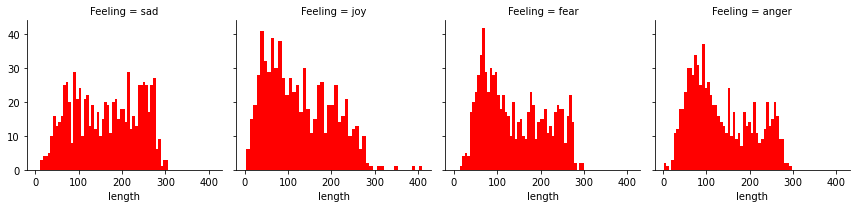

In [ ]:
#Dataset Summary
dataset.describe(include='all')
dataset['length'] = dataset['tweets'].apply(len)
dataset.head()
graph = sns.FacetGrid(data=dataset, col="Feeling")
graph.map(plt.hist, 'length', bins=50, color="Red")

In [ ]:
#Getting the mean values 
val = dataset.groupby('Feeling').mean()
val

,Unnamed: 0,length
Feeling,,
anger,3478.069100,134.859192
fear,4016.823970,141.269663
joy,1517.969739,126.066025
sad,1661.026415,162.874214


In [ ]:
#finding the correlation 
val.corr()

,Unnamed: 0,length
Unnamed: 0,1.000000,-0.158694
length,-0.158694,1.000000


In [ ]:
dataset.Feeling.value_counts()

fear     801
sad      795
anger    767
joy      727
Name: Feeling, dtype: int64

PLOTTING THE GRAPHS

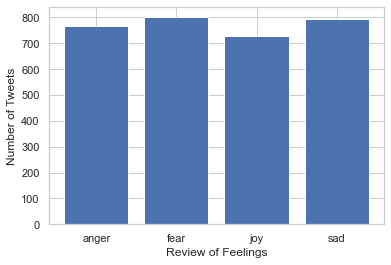

In [ ]:
Feeling_val = dataset.groupby('Feeling').count()
plt.bar(Feeling_val.index.values, Feeling_val['tweets'])
plt.xlabel('Review of Feelings')
plt.ylabel('Number of Tweets')
plt.show()

Insights from the Analysis
1. As the graph shows that most people were feared of the covid-19 wave and panicking.
2. 